In [ ]:
#from cmath import sqrt
import re
import string
import matplotlib.pyplot as plt
from math import sqrt
import math

with open("datapoints.txt") as f_read:
    data_points = f_read.readlines()
    data_points.pop(0)      # 'pop()' removes allocated line, i.e pop(0) removes 1st line

    pokemon_width = []      # create an empty list, we're filling it with pokemons width
    pokemon_height = []     # ==//== height
    pokemon_label = []      # ==//== label, i.e 0, 1


    # splits the text and puts them in three elements. for every row
    for line in data_points: 
        #line = re.sub('[ \n]', '', line)    #'line' determines where text should be replaced. in this case it's replaced within the loop.
        
        # Source: https://support.microsoft.com/en-us/office/eval-function-8c4a1b10-85ba-40db-b0c8-5290da4d4166
        # You can use the Eval function to evaluate an expression that results in a text string or a numeric value.
        # You can construct a string and then pass it to the Eval function as if the string were an actual expression.
        # The Eval function evaluates the string expression and returns its value. For example, Eval("1 + 1") returns 2.
        # In this case it reads the data in 'line.split(',')' and returns it as an 'int'.
        # for every split
        Width, Height, Label = [float(i) for i in line.split(',')]


        pokemon_width.append(Width)       # appends to pokemon_width
        pokemon_height.append(Height)     # appends to pokemon_height
        pokemon_label.append(Label)       # appends to pokemon_label
        
#print(data_points)
#print(pokemon_label)

# define a new function called "pokemon_plot():"
def pokemon_plot():
    # 'zip()' returns a zip object. iterator where the first item in each passes iterator is paired together, and then the second etc.
    # makes it so that every element has a corresponding width, height and label. It is needed to know which datapoints
    # corresponds with Pichu and which datapoints that corresponds with Pikachu 
    for (widthplot, heightplot, labelplot) in zip(pokemon_width, pokemon_height, pokemon_label):
        # chooses the color for the pokemon. If "'labelplot' = 0": pokemon is pichu. Else it's pikachu.
        if labelplot == 0:
            color_of_pokemon = "Blue"
        else:
            color_of_pokemon = "Red"
        # prints the actual points on the plot. changes color accordingly to the value of 'labelplot', i.e changes color
        # according to the pokemon, pichu or pickachu.
        plt.plot(widthplot, heightplot, 'o', markerfacecolor=color_of_pokemon, markersize = 10)
    plt.grid()  # estetic. makes the plot look nicer in a grid format.
# calls upon the function
pokemon_plot()

# Sorted 'testpoints.txt'. I found the pattern and removed the first 4 indexes.
# Removes the last index too.
# What is left is as following: '25, 32', '24.2, 31.5' etc.
# Now I can split lines at ',' and append them to two lists, x_width, y_height.

with open ("testpoints.txt", "r") as file:
    testpoints = file.readlines()
    testpoints = testpoints[1:] 
    x_width = []
    y_height = []

    for testpoints_number in testpoints:
        testpoints_number = testpoints_number[4:-2]
        print(testpoints_number)
        # appends to 'x_width'. [0]: takes the first item in the row
        x_width.append(testpoints_number.split(", ")[0])
        # appends to 'y_height'. [1]: takes the second item in the row
        y_height.append(testpoints_number.split(", ")[1])
    
print(x_width)
print(y_height)


#
#  dist_list=[]
# FOR x1, y1 in zip (x_width, y_height)
# v--------------- BÖRJA MED DENNA ----------------v
#   FOR width, height, label in zip(test_w, test_h)
    # test_w = 25
    # test_h = 32
    # distance = ecludian distance formula 
    # dist_list.append(distance, label)
#--------------VIk
#   k-nearest-neighbour
#

dist_list = []
for x1, y1 in zip (x_width, y_height):
    for width, height, label in zip(pokemon_width, pokemon_height, pokemon_label):
        test_w = 25
        test_h = 32
        distance = sqrt(((test_w - width)**2) + ((test_h - height)**2))
        dist_list.append([distance, label])
print(dist_list)

25, 32
24.2, 31.5
22, 34
20.5, 34
[25.0, 24.2, 22.0, 20.5]
[32.0, 31.5, 34.0, 34.0]
[[1.0], [1.0], [1.0], [0.0]] this is pokemon list, testpoints
what is this: [[0.6493009828376893, 1.0]]
what is this: [[0.8407637696691934, 0.0]]


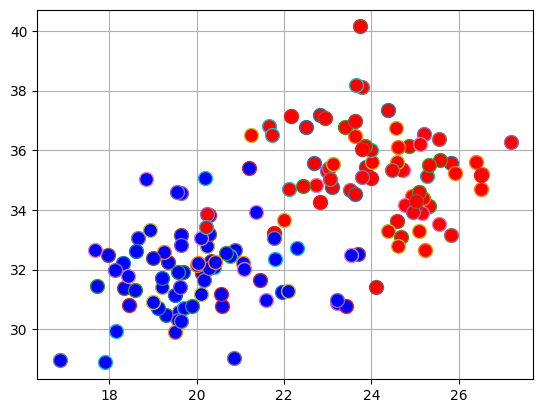

In [45]:
from math import sqrt
import re
import string
import matplotlib.pyplot as plt
import math

with open("datapoints.txt") as f_read:
    data_points = f_read.readlines()
    data_points.pop(0)      # 'pop()' removes allocated line, i.e pop(0) removes 1st line

    pokemon_width = []      # create an empty list, we're filling it with pokemons width
    pokemon_height = []     # ==//== height
    pokemon_label = []      # ==//== label, i.e 0, 1


    # splits the text and puts them in three elements. for every row
    for line in data_points: 
        #line = re.sub('[ \n]', '', line)    #'line' determines where text should be replaced. in this case it's replaced within the loop.
        
        # Source: https://support.microsoft.com/en-us/office/eval-function-8c4a1b10-85ba-40db-b0c8-5290da4d4166
        # You can use the Eval function to evaluate an expression that results in a text string or a numeric value.
        # You can construct a string and then pass it to the Eval function as if the string were an actual expression.
        # The Eval function evaluates the string expression and returns its value. For example, Eval("1 + 1") returns 2.
        # In this case it reads the data in 'line.split(',')' and returns it as an 'int'.
        # for every split
        Width, Height, Label = [float(i) for i in line.split(',')]


        pokemon_width.append(Width)       # appends to pokemon_width
        pokemon_height.append(Height)     # appends to pokemon_height
        pokemon_label.append(Label)       # appends to pokemon_label
        
#print(data_points)
#print(pokemon_label)

# define a new function called "pokemon_plot():"
def pokemon_plot():
    # 'zip()' returns a zip object. iterator where the first item in each passes iterator is paired together, and then the second etc.
    # makes it so that every element has a corresponding width, height and label. It is needed to know which datapoints
    # corresponds with Pichu and which datapoints that corresponds with Pikachu 
    for (widthplot, heightplot, labelplot) in zip(pokemon_width, pokemon_height, pokemon_label):
        # chooses the color for the pokemon. If "'labelplot' = 0": pokemon is pichu. Else it's pikachu.
        if labelplot == 0:
            color_of_pokemon = "Blue"
        else:
            color_of_pokemon = "Red"
        # prints the actual points on the plot. changes color accordingly to the value of 'labelplot', i.e changes color
        # according to the pokemon, pichu or pickachu.
        plt.plot(widthplot, heightplot, 'o', markerfacecolor=color_of_pokemon, markersize = 10)
    plt.grid()  # estetic. makes the plot look nicer in a grid format.
# calls upon the function
pokemon_plot()

# Sorted 'testpoints.txt'. I found the pattern and removed the first 4 indexes.
# Removes the last index too.
# What is left is as following: '25, 32', '24.2, 31.5' etc.
# Now I can split lines at ',' and append them to two lists, x_width, y_height.

with open ("testpoints.txt", "r") as file:
    testpoints = file.readlines()
    testpoints = testpoints[1:] 
    x_width = []
    y_height = []

    for testpoints_number in testpoints:
        testpoints_number = testpoints_number[4:-2]
        print(testpoints_number)
        # appends to 'x_width'. [0]: takes the first item in the row
        x_width.append(testpoints_number.split(", ")[0])
        # appends to 'y_height'. [1]: takes the second item in the row
        y_height.append(testpoints_number.split(", ")[1])
        # Need LC to float 

x_width = [float(i) for i in x_width]
print(x_width)
y_height = [float(i) for i in y_height]
print(y_height)


#
#  dist_list=[]
# FOR x1, y1 in zip (x_width, y_height)
# v--------------- BÖRJA MED DENNA ----------------v
#   FOR width, height, label in zip(test_w, test_h)
    # test_w = 25
    # test_h = 32
    # distance = ecludian distance formula 
    # dist_list.append(distance, label)
#--------------VIk
#   k-nearest-neighbour
#

# make this a function so i don't necessarily call it. i want
# the user to enter their data, not predetermined data from 'testpoints.txt'.
prediction = []
for x1, y1 in zip (x_width, y_height):
    dist_list = []
    for width, height, label in zip(pokemon_width, pokemon_height, pokemon_label):

       # test_w = 25
        #test_h = 32
        distance = sqrt((x1 - width)**2 + (y1 - height)**2)
       # print((x1 - width)**2 + (y1 - height)**2)
        dist_list.append([distance, label])

       # print(float(distance))
    # Sorts the list from smallest distance of trainingpoint to testpoint
    # key defines what i want to sorty by
    # i.e first value of the inner list

    #maybe .sort() instead
    dist_list = sorted(dist_list, key=lambda x:x[0])
    prediction.append([dist_list[0][1]])
    # if list prediction pichu or pika
    # list comprehension 

#print(dist_list)
#print(dist_list)
print(f"{prediction} this is pokemon list, testpoints")
#if dist_list[1]
print(f"what is this: {[dist_list[2]]}")
print(f"what is this: {[dist_list[3]]}")

In [ ]:
print(x_width)
print(y_height)
print(pokemon_height)
print(pokemon_width)
print(dist_list)
